### Sales

In this session, we calculate:

* [Users Conversions](#users_conversion)
* [Users' order volume within a period of time](#users_order_volume)
* [Users' average purchase size](#average_purchase_size)
* [Users' life time value](#LTV)

#### Users Conversion <a id='users_conversion'></a>

In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d.

In [23]:
# Group to retrieve the users' first visits
first_time_visit = visits.groupby('uid')['start_ts'].min().reset_index()
first_time_visit.columns = ('uid', 'first_visit_date')

# Group to retrieve the users' first orders
first_order_grouped = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order_grouped.columns = ('uid', 'first_order_date')

# Merge both grouped dataframes
orders_new = first_order_grouped.merge(orders.merge(first_time_visit, on='uid'), on='uid')

# Add 'cohort' and 'first_visit_month' columns
orders_new['cohort'] = ((orders_new['first_order_date'] - orders_new['first_visit_date'])\
                                / np.timedelta64(1, 'D')).round().astype('int')
orders_new['first_visit_month'] = orders_new['first_visit_date']\
                                                  .apply(lambda x: x.strftime('%Y-%m'))


orders_new.loc[:,'revenue'] = orders_new['revenue'].astype('float').round(2)
display(orders_new)

,uid,first_order_date,buy_ts,revenue,first_visit_date,cohort,first_visit_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03 21:51:00,0.55,2017-09-18 22:49:00,107,2017-09
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,1.22,2017-06-03 10:13:00,0,2017-06
2,1575281904278712,2017-06-03 10:13:00,2017-06-03 17:39:00,1.83,2017-06-03 10:13:00,0,2017-06
3,2429014661409475,2017-10-11 18:33:00,2017-10-11 18:33:00,73.33,2017-10-11 17:14:00,0,2017-10
4,2464366381792757,2018-01-28 15:54:00,2018-01-28 15:54:00,2.44,2018-01-27 20:10:00,1,2018-01
...,...,...,...,...,...,...,...
50410,18445407535914413204,2017-09-22 23:55:00,2017-09-24 23:48:00,0.24,2017-09-22 23:48:00,0,2017-09
50411,18445407535914413204,2017-09-22 23:55:00,2017-09-25 15:56:00,0.12,2017-09-22 23:48:00,0,2017-09
50412,18445601152732270159,2018-03-26 22:54:00,2018-03-26 22:54:00,4.22,2017-08-07 11:51:00,231,2017-08
50413,18446156210226471712,2018-02-18 19:34:00,2018-02-18 19:34:00,9.78,2017-11-07 10:01:00,103,2017-11


,first_visit_month,cohort,cohort_users,uid,conversion(%)
0,2017-06,0,1725,13259,13.01
1,2017-06,1,110,13259,0.83
2,2017-06,2,38,13259,0.29
5,2017-06,5,14,13259,0.11
7,2017-06,7,11,13259,0.08


cohort,0,1,2,5,7,14,25,26,27,28,37,40,60
first_visit_month,,,,,,,,,,,,,
2017-06,13.01,0.83,0.29,0.11,0.08,0.06,0.03,0.03,0.09,0.03,0.05,0.01,0.04
2017-07,11.24,0.68,0.26,0.15,0.11,0.04,NaN,0.01,0.02,0.05,0.02,0.03,0.02
2017-08,10.46,0.46,0.20,0.12,0.06,0.06,0.05,0.05,0.02,0.05,0.03,0.02,0.02
2017-09,11.30,0.75,0.27,0.23,0.19,0.07,0.03,0.06,0.04,0.03,0.04,0.02,0.04
2017-10,12.21,0.80,0.32,0.13,0.09,0.06,0.05,0.03,0.02,0.05,0.03,0.03,0.03
2017-11,10.02,0.83,0.34,0.14,0.10,0.10,0.06,0.04,0.03,0.04,0.02,0.04,0.02
2017-12,11.28,0.85,0.34,0.19,0.10,0.06,0.03,0.02,0.02,0.04,0.03,0.02,0.01
2018-01,9.70,0.82,0.31,0.14,0.09,0.06,0.02,0.02,0.04,0.03,0.02,0.02,0.03
2018-02,10.71,0.73,0.31,0.14,0.12,0.05,0.00,0.02,0.03,0.02,0.02,0.01,0.00


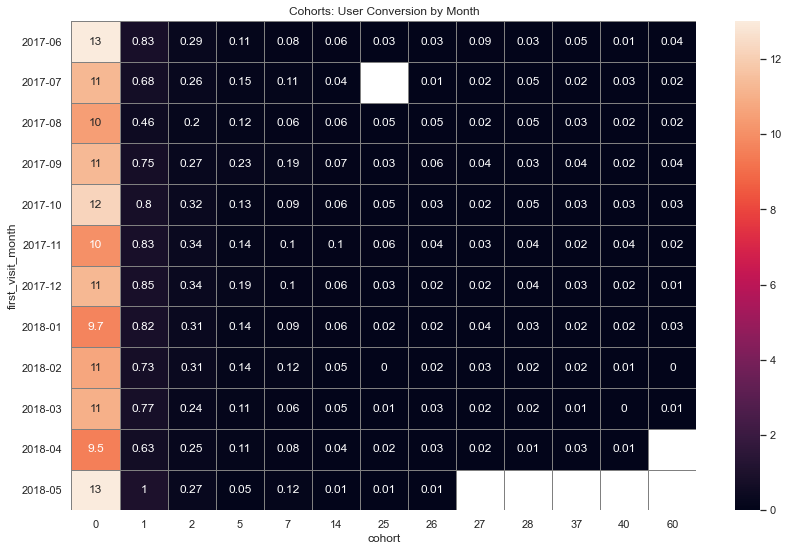

In [24]:
# Group the filtered df by 'first_visit_month' and 'cohort' and count the unique id to get the cohort users
orders_cohort1 = orders_new.groupby(['first_visit_month', 'cohort'])['uid'].nunique().reset_index()
orders_cohort1.columns = ('first_visit_month', 'cohort', 'cohort_users')

# Join the uid column(total_visitors) from visit_cohort df to orders_cohort df on first_visit_month column
orders_cohort = orders_cohort1.merge(visit_cohort[['first_visit_month', 'uid']], on='first_visit_month', how='outer')
orders_cohort = orders_cohort.drop_duplicates().reset_index(drop=True)

# Calculate the conversion rate
orders_cohort['conversion(%)'] = ((orders_cohort['cohort_users'] / orders_cohort['uid'])\
                                  * 100).round(2)

# Randomly select rentention numbers of days for a concise analysis
conversion_list = [0, 1, 2, 5, 7, 14, 25, 26, 27, 28, 37, 40, 60]
orders_cohort_updated = orders_cohort[orders_cohort['cohort'].isin(conversion_list)]
display(orders_cohort_updated.head())

# Create a pivot table to sum the conversion rates according to the first_visit_month and cohort
orders_cohort_pivot = orders_cohort_updated\
        .pivot_table(index='first_visit_month', columns='cohort', values='conversion(%)', aggfunc='sum')
display(orders_cohort_pivot)

# Graphical Representation
sns.set(style='white')
plt.figure(figsize=(14, 9))
plt.title('Cohorts: User Conversion by Month')
sns.heatmap(orders_cohort_pivot, annot=True, linewidths=1, linecolor='gray')
plt.yticks(rotation=360)
plt.show()

#### Users' order volume within a period of time <a id='users_order_volume'></a>

Here, we calculate the customers' order size at a given period of time. By month

,order_month,num_of_orders
0,2017-06,2354
1,2017-07,2363
2,2017-08,1807
3,2017-09,3387
4,2017-10,5679
5,2017-11,5659
6,2017-12,6218
7,2018-01,4721
8,2018-02,5281
9,2018-03,5326


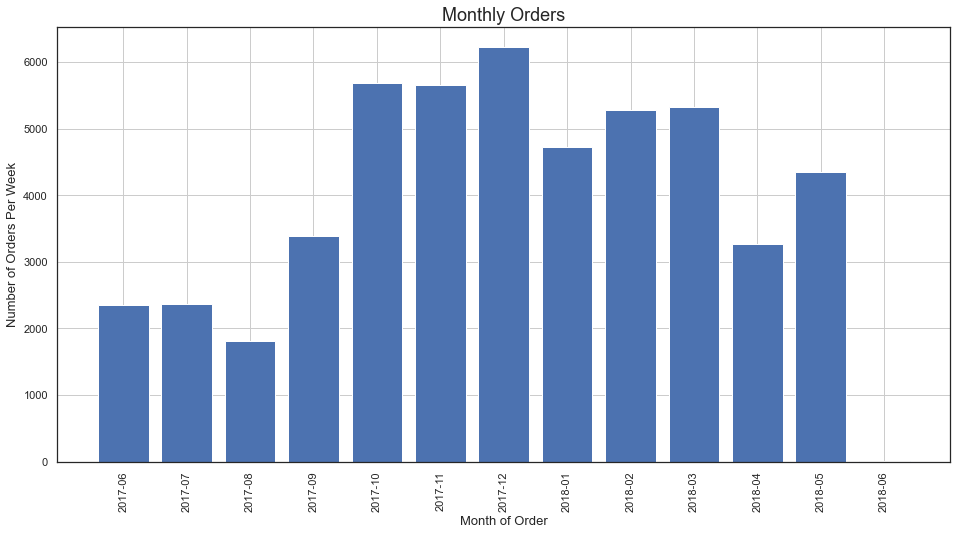

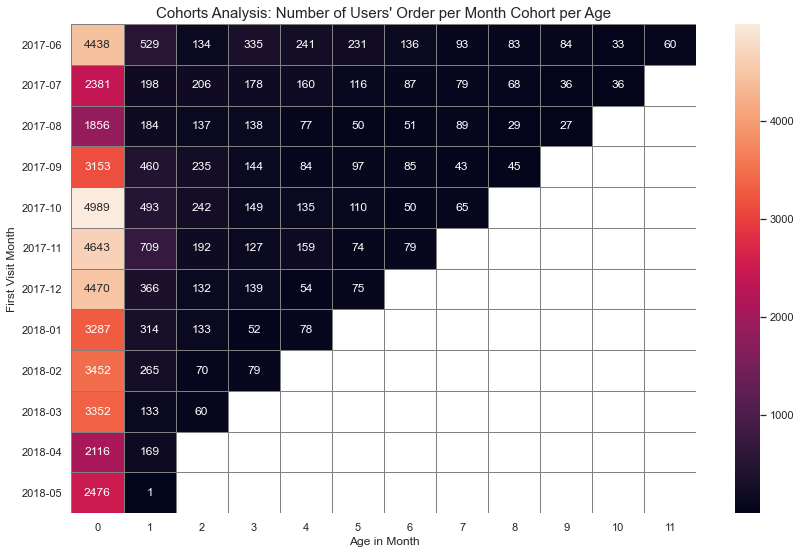

In [25]:
# Add order_month to the order dataframe
orders['order_month'] = orders['buy_ts'].apply(lambda x: x.strftime('%Y-%m'))

# Group orders df by order_month
orders_volume_month = orders.groupby('order_month')['uid'].count().reset_index()
orders_volume_month.columns = ('order_month', 'num_of_orders')
display(orders_volume_month)

# Add new columns to orders_new
orders_new['first_order_month'] = orders_new['first_order_date'].apply(lambda x: x.strftime('%Y-%m'))
orders_new['order_month'] = orders_new['buy_ts'].apply(lambda x: x.strftime('%Y-%m'))

# Add the age_month(the number of months it took for a user to make a purchase after the first visit)
orders_new['age_month'] = ((pd.to_datetime(orders_new['first_order_month']) \
                             - pd.to_datetime(orders_new['first_visit_month'])) \
                             / np.timedelta64(1, 'M')).round().astype('int')

# Graphical representation of users order volume per month
plt.figure(figsize=(16, 8))
plt.bar(orders_volume_month['order_month'], orders_volume_month['num_of_orders'])
plt.title('Monthly Orders', size=18)
plt.xlabel('Month of Order', size=13)
plt.xticks(rotation=90)
plt.ylabel('Number of Orders Per Week', size=13)
plt.grid(True)
plt.show()

# Graphical Representation of number of users' order per month cohort per age
sns.set(style='white')
plt.figure(figsize=(14, 9))
plt.title("Cohorts Analysis: Number of Users' Order per Month Cohort per Age", size=15)
sns.heatmap(orders_new.pivot_table(index='first_visit_month', columns='age_month', values='uid', aggfunc='count'),\
            annot=True, linewidths=1, fmt='0.10g', linecolor='gray')
plt.yticks(rotation=360)
plt.ylabel("First Visit Month", size=12)
plt.xlabel("Age in Month", size=12)
plt.show()

In [26]:
orders[orders['order_month'] == '2018-06']

,buy_ts,revenue,uid,order_month
50414,2018-06-01 00:02:00,3.42,83872787173869366,2018-06


#### Users' Average Purchase Size <a id='average_purchase_size'></a>

In [27]:
# Average purchase size per month
display('The average monthly order size is: {}'.format((orders_volume_month['num_of_orders'].sum()\
                                                        / len(orders_volume_month)).round().astype('int')))

# Overall average purchase size
display('The overall average revenue is {}'.format(orders['revenue'].mean().round(2)))

'The average monthly order size is: 3878'

'The overall average revenue is 5.0'

#### Users' Life Time Value <a id='LTV'></a>

Here, we answer the question: How much money do the customers bring?

In [28]:
# Group orders_new df by first_visit_month and get the unique number of buyers for the month
ltv_group_1 = orders_new.groupby('first_visit_month')['uid'].nunique().reset_index()
ltv_group_1.columns = ('first_visit_month', 'num_of_buyers')

# Group orders_new df by first_visit_month and first_order_month and get the sum revenue for each group
ltv_group_2 = orders_new.groupby(['first_visit_month', 'first_order_month'])['revenue'].sum().reset_index()

# Merge the two dfs on first_visit_month
ltv_cohort_month = ltv_group_2.merge(ltv_group_1, on='first_visit_month')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,4.11,0.74,0.13,0.77,0.23,0.36,0.10,0.18,0.05,0.05,0.03,0.1
2017-07,2.40,0.30,0.23,0.18,0.13,0.10,0.08,0.08,0.07,0.04,0.02,NaN
2017-08,2.72,0.22,0.15,0.15,0.08,0.06,0.07,0.38,0.04,0.04,NaN,NaN
2017-09,4.63,0.39,0.20,0.08,0.04,0.05,0.05,0.03,0.03,NaN,NaN,NaN
2017-10,2.40,0.28,0.08,0.06,0.07,0.05,0.02,0.02,NaN,NaN,NaN,NaN
2017-11,2.23,0.34,0.07,0.06,0.08,0.05,0.04,NaN,NaN,NaN,NaN,NaN
2017-12,3.44,0.15,0.07,0.10,0.03,0.04,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.98,0.19,0.07,0.03,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.99,0.25,0.07,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


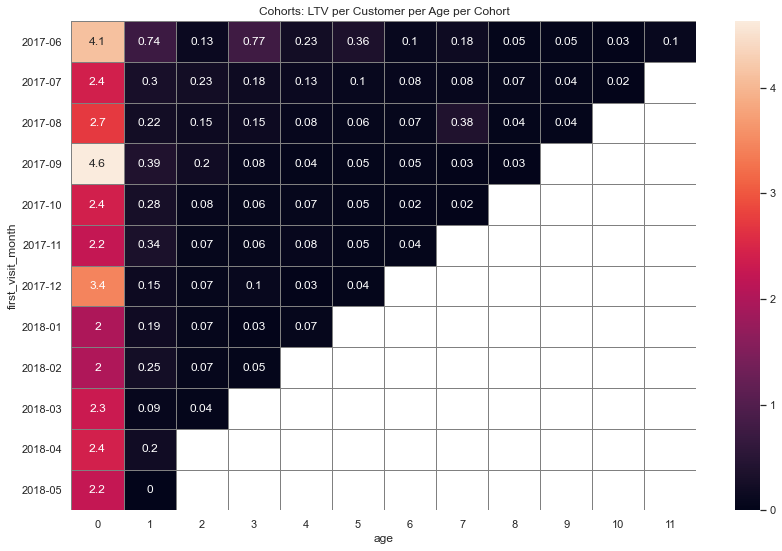

In [29]:
# Calculate the gross profit assuming our profit margin rate is 0.5
profit_margin = 0.5
ltv_cohort_month['gp'] = ltv_cohort_month['revenue'] * profit_margin

# Add the age column in months, this is the number of months that passed from the first visit till the first purchases  
ltv_cohort_month['age'] = ((pd.to_datetime(ltv_cohort_month['first_order_month'])\
                    - pd.to_datetime(ltv_cohort_month['first_visit_month']))\
                    / np.timedelta64(1, 'M')).round().astype('int')

# Calculate the LTV per user
ltv_cohort_month['ltv'] = ltv_cohort_month['gp'] / ltv_cohort_month['num_of_buyers']



result_ltv = (ltv_cohort_month.pivot_table(
                index='first_visit_month',
                columns='age',
                values='ltv',
                aggfunc='mean'
                )).round(2)
display(result_ltv)

# Graphical representation of the LTV per customer per month per cohort
sns.set(style='white')
plt.figure(figsize=(14, 9))
plt.title('Cohorts: LTV per Customer per Age per Cohort')
sns.heatmap(result_ltv, annot=True, linewidths=1, linecolor='gray')
plt.yticks(rotation=360)
plt.show()

In [30]:
# This calculates the average ltv per customer per cohort
avg_ltv = result_ltv.cumsum(axis=1).mean(axis=0).reset_index()
avg_ltv.columns = ('age', 'avg_ltv')
display(avg_ltv)

,age,avg_ltv
0,0,2.737500
1,1,3.000000
2,2,3.226000
3,3,3.478889
4,4,3.710000
5,5,4.007143
6,6,4.096667
7,7,4.480000
8,8,4.902500
9,9,4.746667
